In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Loading and Overview

In [ ]:
df = pd.read_csv('Arrests.csv', index_col=0)
df.head()

,released,colour,year,age,sex,employed,citizen,checks
1,Yes,White,2002,21,Male,Yes,Yes,3
2,No,Black,1999,17,Male,Yes,Yes,3
3,Yes,White,2000,24,Male,Yes,Yes,3
4,No,Black,2000,46,Male,Yes,Yes,1
5,Yes,Black,1999,27,Female,Yes,Yes,1


In [ ]:
print('The non-numeric columns are summaried as follows:')
for col in df.select_dtypes(exclude=['number']).columns:
  uniques = df[col].unique()
  print(f'Column "{col}" contains following values: {uniques}')

The non-numeric columns are summaried as follows:
Column "released" contains following values: ['Yes' 'No']
Column "colour" contains following values: ['White' 'Black']
Column "sex" contains following values: ['Male' 'Female']
Column "employed" contains following values: ['Yes' 'No']
Column "citizen" contains following values: ['Yes' 'No']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 1 to 5226
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   released  5226 non-null   object
 1   colour    5226 non-null   object
 2   year      5226 non-null   int64 
 3   age       5226 non-null   int64 
 4   sex       5226 non-null   object
 5   employed  5226 non-null   object
 6   citizen   5226 non-null   object
 7   checks    5226 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 367.5+ KB


In [ ]:
df['released'] = df['released'].apply(lambda x:1 if x=='Yes' else 0)
df['employed'] = df['employed'].apply(lambda x:1 if x=='Yes' else 0)
df['citizen'] = df['citizen'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
# Male as 1 and Female as 0
df['sex'] = df['sex'].apply(lambda x:1 if x=='Male' else 0)

In [ ]:
# Black as 1 and White as 0
df['colour'] = df['colour'].apply(lambda x:1 if x=='Black' else 0)

In [ ]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks
1,1,0,2002,21,1,1,1,3
2,0,1,1999,17,1,1,1,3
3,1,0,2000,24,1,1,1,3
4,0,1,2000,46,1,1,1,1
5,1,1,1999,27,0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 1 to 5226
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   released  5226 non-null   int64
 1   colour    5226 non-null   int64
 2   year      5226 non-null   int64
 3   age       5226 non-null   int64
 4   sex       5226 non-null   int64
 5   employed  5226 non-null   int64
 6   citizen   5226 non-null   int64
 7   checks    5226 non-null   int64
dtypes: int64(8)
memory usage: 367.5 KB


# EDA

## Overview

In [ ]:
male = sum(df['sex']==1)
female = sum(df['sex']==0)

In [ ]:
black = sum(df['colour']==1)
white = sum(df['colour']==0)

In [ ]:
black_male = sum((df['sex']==1) & (df['colour']==1))
white_male = sum((df['sex']==1) & (df['colour']==0))
black_female = sum((df['sex']==0) & (df['colour']==1))
white_female = sum((df['sex']==0) & (df['colour']==0))

In [ ]:
sizes1 = [male, female]
labels1 = ['Male', 'Female']
colors1 = ['orange', 'pink']

sizes2 = [black, white]
labels2 = ['Black', 'White']
colors2 = ['black', 'lightgrey']

sizes3 = [black_male, white_male, black_female, white_female]
labels3 = [labels2[i]+' '+labels1[j] for j in range(2) for i in range(2)]
colors3 = reversed(['#ff149350','#ff1493','#ff8c0050','#ff8c00'])

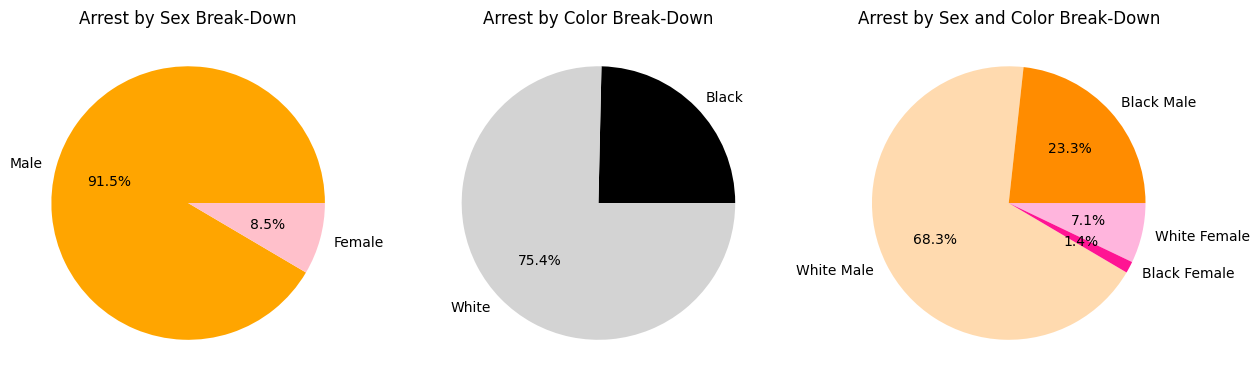

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', colors=colors1)
axs[0].set_title('Arrest by Sex Break-Down')

axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors2)
axs[1].set_title('Arrest by Color Break-Down')

axs[2].pie(sizes3, labels=labels3, autopct='%1.1f%%', colors=colors3)
axs[2].set_title('Arrest by Sex and Color Break-Down')

plt.show()

## Check Time-based changes

In [ ]:
total_year = df.groupby('year')[['released']].count()
male_year = df[df['sex']==1].groupby('year')['released'].count()
female_year = df[df['sex']==0].groupby('year')['released'].count()

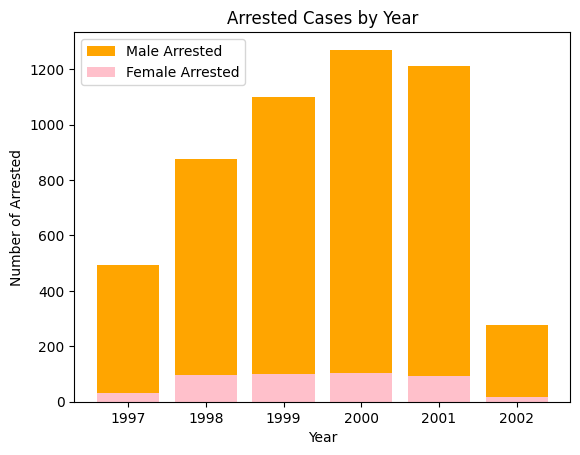

In [ ]:
plt.bar(female_year.index, female_year.values, label='Female Arrested', color='pink')
plt.bar(male_year.index, male_year.values, bottom=female_year.values, label='Male Arrested', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Arrested')
plt.title('Arrested Cases by Year')
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.show()

In [ ]:
b_year = df[df['colour']==1].groupby('year')['colour'].count()
w_year = df[df['colour']==0].groupby('year')['colour'].count()

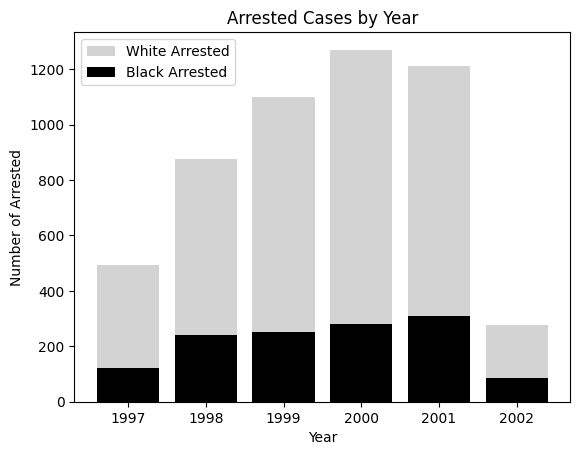

In [ ]:
plt.bar(b_year.index, b_year.values, label='Black Arrested', color='black')
plt.bar(w_year.index, w_year.values, bottom=b_year.values, label='White Arrested', color='lightgrey')

plt.xlabel('Year')
plt.ylabel('Number of Arrested')
plt.title('Arrested Cases by Year')
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.show()

In [ ]:
df[(df['colour']==0) & (df['sex']==0)].groupby('year')['age'].count().values

array([27, 73, 86, 93, 78, 14])

In [ ]:
df[(df['colour']==1) & (df['sex']==0)].groupby('year')['age'].count().values

array([ 5, 22, 14, 12, 15,  4])

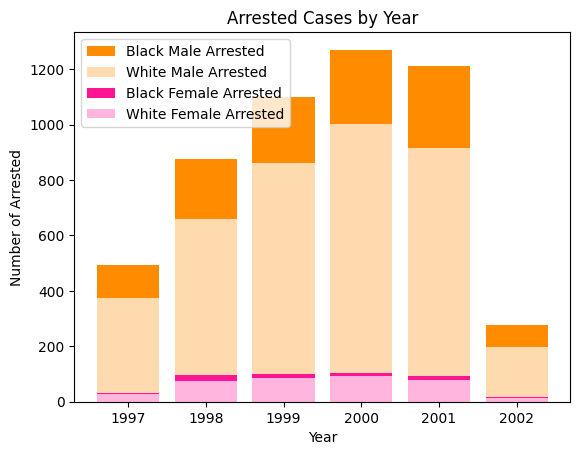

In [ ]:
sex = ['Female', 'Male']
colour = ['White', 'Black']
colors = [['#ff149350','#ff1493'],['#ff8c0050','#ff8c00']]
series = []
for s in range(2):
  for c in range(2):
    serie = df[(df['colour']==c) & (df['sex']==s)].groupby('year')['age'].count()
    if len(series)==0:
      plt.bar(serie.index, serie.values, label=f'{colour[c]} {sex[s]} Arrested', color=colors[s][c])
    else:
      plt.bar(serie.index, serie.values, bottom=sum([series[n].values for n in range(len(series))]), label=f'{colour[c]} {sex[s]} Arrested', color=colors[s][c])
    series.append(serie)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)

plt.xlabel('Year')
plt.ylabel('Number of Arrested')
plt.title('Arrested Cases by Year')
plt.show()

## Check Age-Based Difference

In [ ]:
min_age = df['age'].min()
max_age = df['age'].max()
age_range = range(min_age, max_age+1)

In [ ]:
male_age = [sum(df[df['sex']==1]['age']==i) for i in age_range]
female_age = [sum(df[df['sex']==0]['age']==i) for i in age_range]

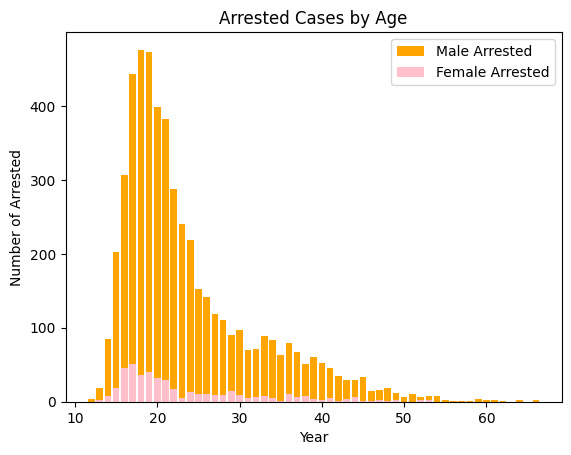

In [ ]:
plt.bar(age_range, female_age, label='Female Arrested', color='pink')
plt.bar(age_range, male_age, bottom=female_age, label='Male Arrested', color='orange')

plt.xlabel('Year')
plt.ylabel('Number of Arrested')
plt.title('Arrested Cases by Age')
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.show()

In [ ]:
b_age = [sum(df[df['colour']==1]['age']==i) for i in age_range]
w_age = [sum(df[df['colour']==0]['age']==i) for i in age_range]

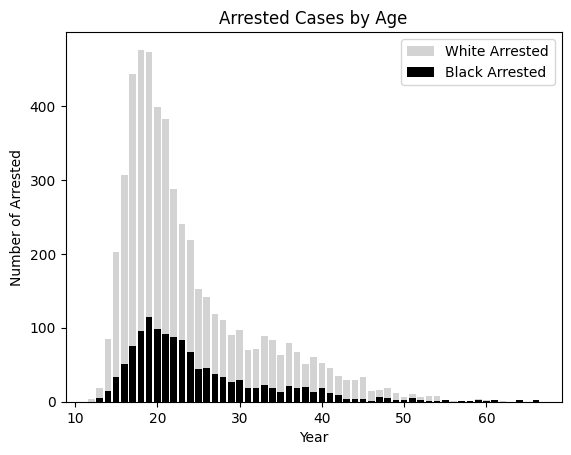

In [ ]:
plt.bar(age_range, b_age, label='Black Arrested', color='black')
plt.bar(age_range, w_age, bottom=b_age, label='White Arrested', color='lightgrey')

plt.xlabel('Year')
plt.ylabel('Number of Arrested')
plt.title('Arrested Cases by Age')
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.show()

# Accuracy across Groups

In [ ]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks
1,1,0,2002,21,1,1,1,3
2,0,1,1999,17,1,1,1,3
3,1,0,2000,24,1,1,1,3
4,0,1,2000,46,1,1,1,1
5,1,1,1999,27,0,1,1,1


In [ ]:
df['guilty'] = (1-df['released']).astype(int)

In [ ]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks,guilty
1,1,0,2002,21,1,1,1,3,0
2,0,1,1999,17,1,1,1,3,1
3,1,0,2000,24,1,1,1,3,0
4,0,1,2000,46,1,1,1,1,1
5,1,1,1999,27,0,1,1,1,0


In [ ]:
def calc_accuracy(group, col='guilty'):
  return sum(group[col])/len(group[col])

In [ ]:
def get_groups(df):
  bm = df[(df['colour']==1) & (df['sex']==1)]
  wm = df[(df['colour']==0) & (df['sex']==1)]
  bf = df[(df['colour']==1) & (df['sex']==0)]
  wf = df[(df['colour']==0) & (df['sex']==0)]
  return bm,wm,bf,wf

In [ ]:
labels = ['black male', 'white male', 'black female', 'white female']

In [ ]:
acc = [calc_accuracy(g) for g in get_groups(df)]

In [ ]:
cnt = [black_male, white_male, black_female, white_female]

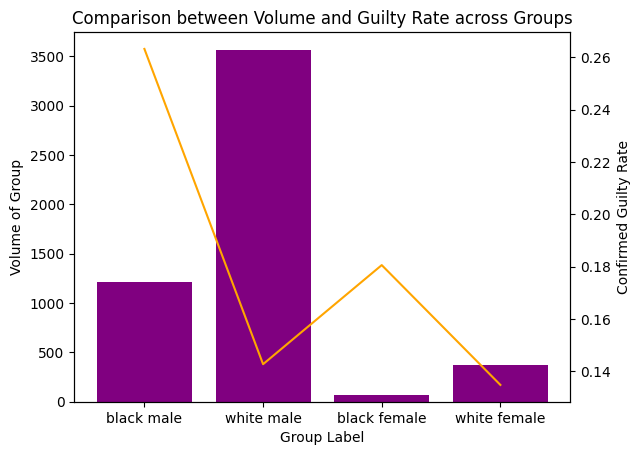

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(labels, cnt, color='purple')
ax1.set_ylabel('Volume of Group')

ax2 = ax1.twinx()

ax2.plot(labels, acc, color='orange')
ax2.set_ylabel('Confirmed Guilty Rate')

ax1.set_xlabel('Group Label')
plt.title('Comparison between Volume and Guilty Rate across Groups')

plt.show()

# Base Model

In [ ]:
df.drop('released', axis=1, inplace=True)

In [ ]:
df['year'] = df['year'].astype(str)

In [ ]:
y = df['guilty'].copy()
X = df.drop('guilty', axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

In [ ]:
X_test['truth'] = y_test
X_test['pred'] = y_hat

In [ ]:
print(f'The base model has:')
print(f'Accuracy: {accuracy_score(y_test, y_hat):.2f}')

The base model has:
Accuracy: 0.79


In [ ]:
def calc_metric(data):
  tp = len(data[(data['truth']==1) & (data['pred']==1)])
  fn = len(data[(data['truth']==1) & (data['pred']==0)])
  fp = len(data[(data['truth']==0) & (data['pred']==1)])
  tn = len(data[(data['truth']==0) & (data['pred']==0)])

  accuracy = (tp+tn)/(tp+tn+fn+fp)
  fpr = fp/(fp+tn)
  # precision = tp/(tp+fp)
  recall = tp/(tp+fn)

  return [accuracy, fpr, recall]

In [ ]:
base_metric = [calc_metric(g) for g in get_groups(X_test)]

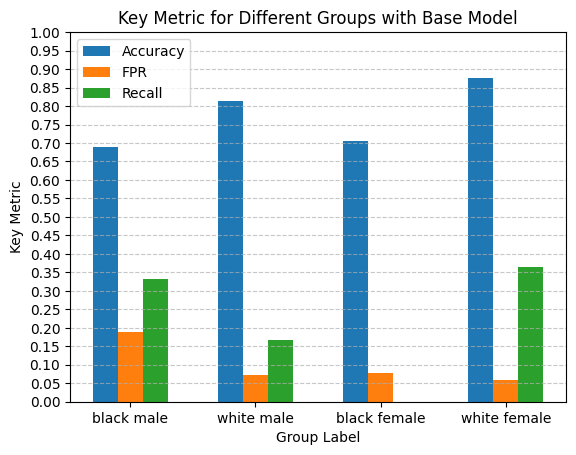

In [ ]:
x = np.arange(len(labels))
bar_width = 0.2

plt.bar(x - bar_width, [m[0] for m in base_metric], width=bar_width, label='Accuracy')
plt.bar(x, [m[1] for m in base_metric], width=bar_width, label='FPR')
plt.bar(x + bar_width, [m[2] for m in base_metric], width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Group Label')
plt.ylabel('Key Metric')
plt.title('Key Metric for Different Groups with Base Model')
plt.xticks(x, labels)
plt.yticks(np.arange(0, 1 + 0.05, 0.05))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

# Model Corrections


Problems discovered:

1. Unparallel sample count
2. Different arrest accuracy among groups


Plans of correction:

1. Reweighting
2. Differential Thresholds
3. Train 4 different classifiers

## Reweighting

In [ ]:
rw_target = max(len(g) for g in get_groups(X_train))
weights = [rw_target/len(g) for g in get_groups(X_train)]

In [ ]:
X_train['group'] = (1-X_train['sex'])*2 + 1-X_train['colour']

In [ ]:
X_train['weight'] = X_train['group'].apply(lambda x:weights[x])

In [ ]:
X_train.groupby('group')['weight'].sum()

group
0    2499.0
1    2499.0
2    2499.0
3    2499.0
Name: weight, dtype: float64

In [ ]:
weight = X_train['weight']
X_train.drop(['weight','group'],axis=1,inplace=True)
X_test.drop(['pred','truth'],axis=1,inplace=True)



clf_preprocess = RandomForestClassifier(random_state = 1000)
clf_preprocess.fit(X_train, y_train, sample_weight=weight)

y_hat_preprocess = clf_preprocess.predict(X_test)

In [ ]:
print(f'The pre-processing model has:')
print(f'Accuracy: {accuracy_score(y_test, y_hat_preprocess):.2f}')

The pre-processing model has:
Accuracy: 0.79


In [ ]:
X_test['truth'] = y_test
X_test['pred'] = y_hat_preprocess

In [ ]:
prep_metric = [calc_metric(g) for g in get_groups(X_test)]

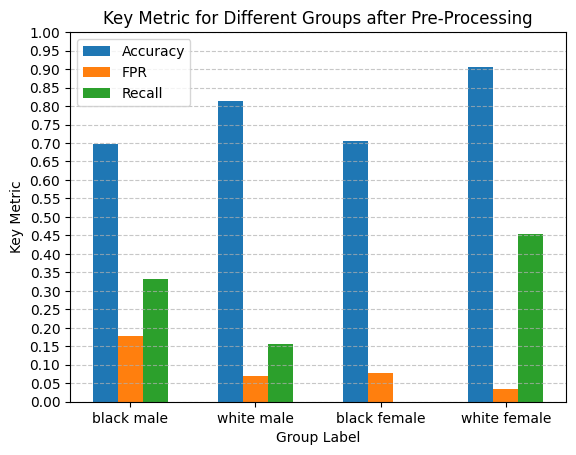

In [ ]:
x = np.arange(len(labels))
bar_width = 0.2

plt.bar(x - bar_width, [m[0] for m in prep_metric], width=bar_width, label='Accuracy')
plt.bar(x, [m[1] for m in prep_metric], width=bar_width, label='FPR')
plt.bar(x + bar_width, [m[2] for m in prep_metric], width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Group Label')
plt.ylabel('Key Metric')
plt.title('Key Metric for Different Groups after Pre-Processing')
plt.xticks(x, labels)
plt.yticks(np.arange(0, 1 + 0.05, 0.05))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

Reweighting did not improve model performance, so although sampling bias is important, it was not the key problem in this project.

## Differential Thresholds

In [ ]:
df['group'] = (1-df['sex'])*2 + 1-df['colour']
df.drop(['sex','colour'],axis=1,inplace=True)

In [ ]:
y = df['guilty'].copy()
X = df.drop('guilty', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
threshold_values = [i/100 for i in range(50, 90, 2)]
y_hat_probs = clf.predict_proba(X_test)[:,1]

In [ ]:
from tqdm import tqdm

In [ ]:
def evaluate_group_thresholds(x, y_true, y_proba, groups, threshold_values):

    unique_groups = np.unique(groups)
    # This enumerates all possible options for threshold values within the range specified
    all_combinations = list(product(threshold_values, repeat=len(unique_groups)))

    # Prepare a list to collect results
    results = []

    for combination in tqdm(all_combinations):
        group_thresholds = {group: threshold for group, threshold in zip(unique_groups, combination)}

        # Apply group-specific thresholds to generate predictions
        y_pred = np.zeros(y_true.shape)
        for group, threshold in group_thresholds.items():
            group_mask = (groups == group)
            y_pred[group_mask] = (y_proba[group_mask] > threshold).astype(int)

        # Calculate FPR for each group
        fprs = []
        metrics = []
        for group in unique_groups:
            group_mask = (groups == group)
            group_true = y_true[group_mask]
            group_pred = y_pred[group_mask]
            group_x = x[group_mask].copy()

            FP = len(group_true[(group_true == 0) & (group_pred == 1)])
            TN = len(group_true[(group_true == 0) & (group_pred == 0)])
            fprs.append(FP / (FP + TN))
            group_x['truth'] = group_true
            group_x['pred'] = group_pred
            metric = calc_metric(group_x)

            metrics.append(metric)
        # Calculate overall accuracy
        overall_accuracy = accuracy_score(y_true, y_pred)

        # Calculate the FPR difference
        fpr_diff = max(fprs) - min(fprs)
        # Create a row of data as a list of four items (see columns for below for ordering)
        row = list(combination) + [overall_accuracy, fpr_diff, metrics]
        results.append(row)

    # Create a DataFrame from the collected results
    columns = ['Threshold 0', 'Threshold 1', 'Threshold 2', 'Threshold 3', 'Model Accuracy', 'FPR Difference', 'Key Metrics']
    results_df = pd.DataFrame(results, columns=columns)


    return results_df


results = evaluate_group_thresholds(x = X_test, y_true = y_test,
                                    y_proba = y_hat_probs,
                                    groups = X_test['group'],
                                    threshold_values = threshold_values)

100%|██████████| 160000/160000 [56:47<00:00, 46.96it/s]


In [ ]:
fpr_threshold_subset = results[results['FPR Difference']<0.025]
# len(fpr_threshold_subset)
max_accuracy_index = fpr_threshold_subset['Model Accuracy'].idxmax()
max_accuracy_row = fpr_threshold_subset.loc[max_accuracy_index]
post_metric = max_accuracy_row[-1]

In [ ]:
print(f'The post-processed model has:')
print(f'Accuracy: {max_accuracy_row[-3]:.2f}')
print(f'Cross-Group FPR Diff: {max_accuracy_row[-2]:.2f}')
for i in range(4):
  print(f'Threshold for {labels[i]}: {max_accuracy_row[i]:.2f}')

The post-processed model has:
Accuracy: 0.82
Cross-Group FPR Diff: 0.02
Threshold for black male: 0.88
Threshold for white male: 0.88
Threshold for black female: 0.66
Threshold for white female: 0.54


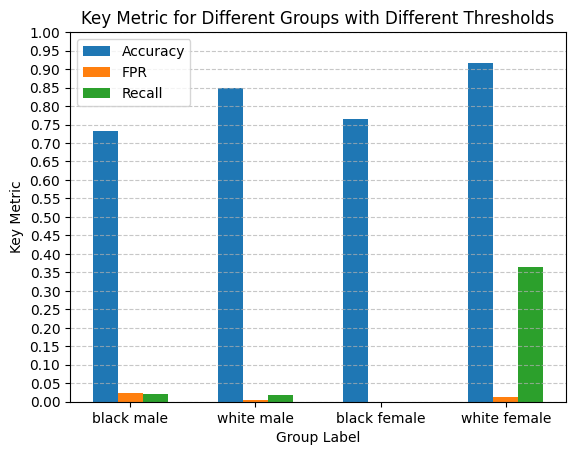

In [ ]:
x = np.arange(len(labels))
bar_width = 0.2

plt.bar(x - bar_width, [m[0] for m in post_metric], width=bar_width, label='Accuracy')
plt.bar(x, [m[1] for m in post_metric], width=bar_width, label='FPR')
plt.bar(x + bar_width, [m[2] for m in post_metric], width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Group Label')
plt.ylabel('Key Metric')
plt.title('Key Metric for Different Groups with Different Thresholds')
plt.xticks(x, labels)
plt.yticks(np.arange(0, 1 + 0.05, 0.05))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

## Separate Classifier

In [ ]:
groups = get_groups(df)
in_metric = []
y_p = np.array([])
y_t = np.array([])
for i in range(4):
  y = groups[i]['guilty'].copy()
  X = groups[i].drop('guilty', axis=1).copy()

  clf_in = RandomForestClassifier(random_state = 1000)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
  clf_in.fit(X_train, y_train)

  y_hat_in = clf.predict(X_test)

  X_test['truth'] = y_test
  X_test['pred'] = y_hat_in

  y_p = np.concatenate((y_p, y_hat_in))
  y_t = np.concatenate((y_t, y_test))

  in_metric.append(calc_metric(X_test))

In [ ]:
print(f'The in-training processing model has:')
print(f'Accuracy: {accuracy_score(y_p, y_t):.2f}')

The in-training processing model has:
Accuracy: 0.89


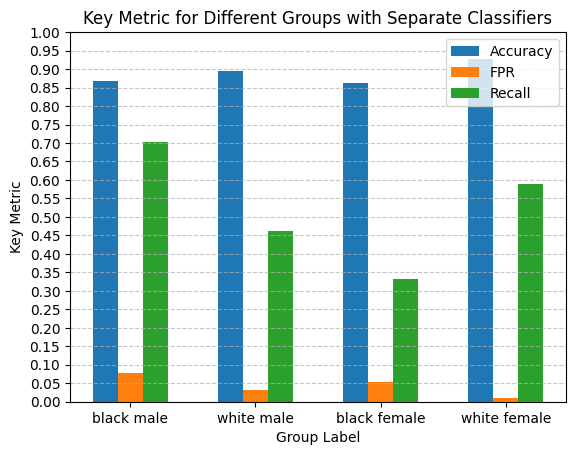

In [ ]:
x = np.arange(len(labels))
bar_width = 0.2

plt.bar(x - bar_width, [m[0] for m in in_metric], width=bar_width, label='Accuracy')
plt.bar(x, [m[1] for m in in_metric], width=bar_width, label='FPR')
plt.bar(x + bar_width, [m[2] for m in in_metric], width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Group Label')
plt.ylabel('Key Metric')
plt.title('Key Metric for Different Groups with Separate Classifiers')
plt.xticks(x, labels)
plt.yticks(np.arange(0, 1 + 0.05, 0.05))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()